In [1]:
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_parcellation
from brainspace.utils.parcellation import map_to_labels 
from brainspace.datasets import load_conte69
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nilearn import plotting
import seaborn as sns
import nibabel as nb

plt.rcParams["pdf.fonttype"]=42  #export as editable text
plt.rcParams["ps.fonttype"]=42
plt.rcParams["svg.fonttype"]="none" #export as editable text

plt.rc("font",size=10)
plt.rc("axes", labelsize=22)
plt.rc("xtick", labelsize=13)
plt.rc("ytick", labelsize=13)
plt.rcParams['axes.linewidth'] = 0.8
screenshot = False
cmap=  "RdBu_r"

/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


# structural connectivity

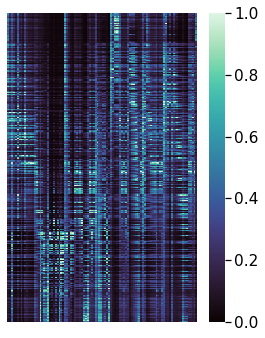

In [46]:
# plot structural conn matrix
#-> already here from fig1  /data/p_02666/Project1_thalamus/plots/figure1/structural_connectivity_sorted.png

#load gradients and input structural connectivity matrix
gradients = np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/gradients_lh.npy")
gradient1=pd.Series(gradients[:,0])
s_conn_matrix=pd.DataFrame(np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/struc_conn_matrix_lh_avg.npy"))

sorted_thalamic_voxels = gradient1.sort_values().index # the gradient1 is a pd.Series
reordered_matrix = s_conn_matrix.loc[sorted_thalamic_voxels, :] # conn matrix is a pd.DataFrame with the shape (thalamic_voxels, cortex_parcels)

fig, ax = plt.subplots(1, figsize=(4,5))
fig = sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 1.5, 'font.family':'Arial'})
fig = sns.heatmap(data=reordered_matrix, vmin=0, vmax=1 ,ax = ax, 
                  cbar=True , #cbar_kws={"orientation":"vertical","label":"normalized","pad":0.06, "aspect":25},
                  cmap="mako", xticklabels=False, yticklabels=False)
#ax.set_xlabel("cortex parcels", fontname="Arial", labelpad=9, fontsize=23)
#ax.set_ylabel("thalamic seed voxels", fontname="Arial", labelpad=9, fontsize=23)

plt.tight_layout()
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure3/structural_connectivity_sorted.png", transparent=True, format='png', dpi=600)


## G1

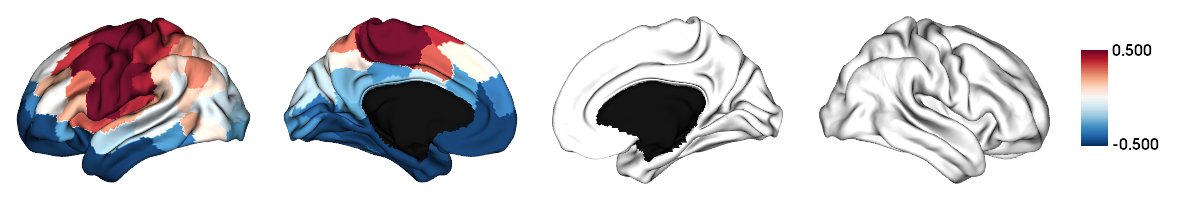

In [47]:
# correlation with Gsconn and project on surface (correlate each parcel column with G1)
# load in structural connectivity matrix
s_conn_matrix=np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/struc_conn_matrix_lh_avg.npy")
#load in gradient values 
gradients = np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/gradients_lh.npy")
schaefer_pc=np.zeros((1,200))

# iterate over comlumns (~parcels)
for p in range(100): #left hem
    r=np.corrcoef(s_conn_matrix[:,p],gradients[:,0])[0][1]  #change here depending on which gradient you want to plot
    schaefer_pc[0,p]=r           # fill into vector
np.save("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/grad1_on_cortex_lh.npy",schaefer_pc) #change name 

surf_lh, surf_rh = load_conte69()
labeling = load_parcellation('schaefer', scale=200, join=True)
mask = labeling != 0
grad = map_to_labels(schaefer_pc[0,:], labeling, mask , fill=np.nan)

plot_hemispheres(surf_lh, surf_rh, array_name=grad,
                 cmap=cmap,color_bar=True,
                 background=(1,1,1),size=(1200,200),zoom=1.5,
                 color_range=(-0.5,0.5),  #(-0.85,0.85),
                 embed_nb=True,
                 interactive=False,
                 screenshot=screenshot, 
                 transparent_bg=True,
                 filename = "/data/p_02666/Project1_thalamus/plots/figure3/grad1_on_cortex_lh_rdbu.png")


/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


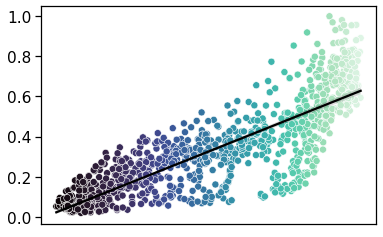

In [48]:
sconn_matrix=np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/struc_conn_matrix_lh_avg.npy")
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["sconn"]=sconn_matrix[:,21]
data["G1"]=gradient1
sns.scatterplot(data["G1"],data["sconn"],
                     hue=data["G1"], s=50, palette="mako", legend=False)
reg_plot=sns.regplot( "G1","sconn", data=data, scatter=False, color="black")
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
#ax.set_yticks([])
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure3/scatter_sconnG1_pos.svg", transparent=True, format='svg')


/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


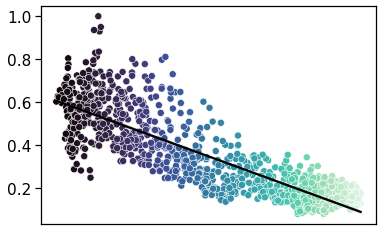

In [49]:
sconn_matrix=np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/struc_conn_matrix_lh_avg.npy")
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["sconn"]=sconn_matrix[:,54]
data["G1"]=gradient1
sns.scatterplot(data["G1"],data["sconn"],
                     hue=data["G1"], s=50, palette="mako", legend=False)
reg_plot=sns.regplot( "G1","sconn", data=data, scatter=False, color="black")
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
#ax.set_yticks([])
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure3/scatter_sconnG1_neg.svg", transparent=True, format='svg')


## G2

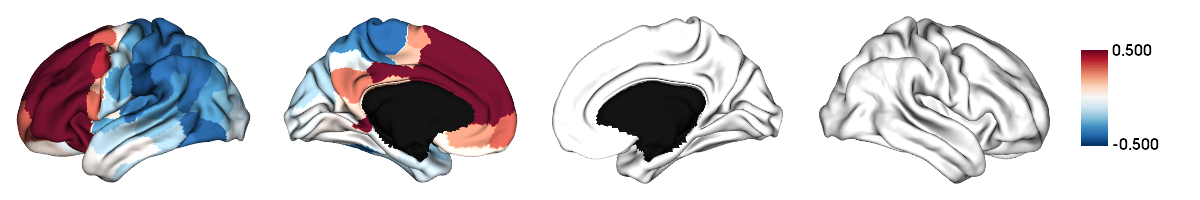

In [50]:
# correlation with Gsconn and project on surface (correlate each parcel column with G2)
# load in structural connectivity matrix
s_conn_matrix=np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/struc_conn_matrix_lh_avg.npy")
#load in gradient values 
gradients = np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/gradients_lh.npy")
schaefer_pc=np.zeros((1,200))

# iterate over comlumns (~parcels)
for p in range(100): #left hem
    r=np.corrcoef(s_conn_matrix[:,p],gradients[:,1])[0][1]  #change here depending on which gradient you want to plot
    schaefer_pc[0,p]=r           # fill into vector
np.save("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/grad2_on_cortex_lh.npy",schaefer_pc) #change name 

surf_lh, surf_rh = load_conte69()
labeling = load_parcellation('schaefer', scale=200, join=True)
mask = labeling != 0
grad = map_to_labels(schaefer_pc[0,:], labeling, mask , fill=np.nan)

plot_hemispheres(surf_lh, surf_rh, array_name=grad,
                 cmap="RdBu_r",color_bar=True,
                 background=(1,1,1),size=(1200,200),zoom=1.5,
                 color_range= (-0.5,0.5),  #(-0.8,0.8),
                 embed_nb=True,
                 interactive=False,
                 screenshot=screenshot, 
                 transparent_bg=True,
                 filename = "/data/p_02666/Project1_thalamus/plots/figure3/grad2_on_cortex_lh_rdbu.png")


# functional connectivity 

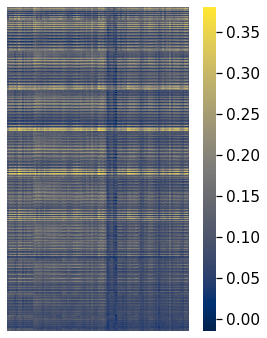

In [3]:
# plot func_conn matrix 
f_conn_matrix_l=np.load("/data/p_02666/Project1_thalamus/functional_connectivity/fc_l.npy")

fig, ax = plt.subplots(1, figsize=(4,5))
fig = sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 1.5, 'font.family':'Arial'})
fig = sns.heatmap(data=f_conn_matrix_l ,ax = ax,  #vmin=0, vmax=1
                  cbar=True , cbar_kws={"orientation":"vertical","pad":0.06, "aspect":25},
                  cmap="cividis", xticklabels=False, yticklabels=False)
#ax.set_xlabel("cortex parcels", fontname="Arial", labelpad=9, fontsize=23)
#ax.set_ylabel("thalamic seed voxels", fontname="Arial", labelpad=9, fontsize=23)

plt.tight_layout()
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure3/func_conn_matrix_lh.png", transparent=True, format='png', dpi=600)


## G1

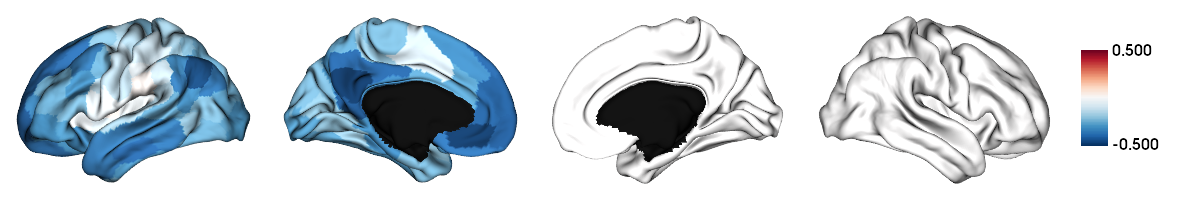

In [4]:
# correlation with Gsconn and project on surface 

f_conn_matrix_l=np.load("/data/p_02666/Project1_thalamus/functional_connectivity/fc_l.npy")
f_conn_matrix_r=np.load("/data/p_02666/Project1_thalamus/functional_connectivity/fc_r.npy")
gradients_l = np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/gradients_lh.npy")
gradients_r = np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/gradients_rh.npy")
schaefer_pc=np.zeros((1,200))

#iterate over columns (~parcels)
for p in range(100): #left hem
    r=np.corrcoef(f_conn_matrix_l[:,p],gradients_l[:,0])[0][1]  #change here depending on which gradient you want to plot
    schaefer_pc[0,p]=r           # fill into vector
np.save("/data/p_02666/Project1_thalamus/functional_connectivity/corr_grad1_fconn_on_cortex_lh.npy",schaefer_pc) #change name 
    
surf_lh, surf_rh = load_conte69()
labeling = load_parcellation('schaefer', scale=200, join=True)
mask = labeling != 0
grad = map_to_labels(schaefer_pc[0,:], labeling, mask , fill=np.nan)

plot_hemispheres(surf_lh, surf_rh, array_name=grad,
                 cmap=cmap,color_bar=True,
                 background=(1,1,1),size=(1200,200), zoom=1.5,
                 color_range= (-0.5,0.5),  #(-0.45,0.45),
                 embed_nb=True,
                 interactive=False,
                 screenshot=screenshot, 
                 transparent_bg=True,
                 filename = "/data/p_02666/Project1_thalamus/plots/figure3/corr_g1_func_on_cortex_lh_rdbu.png")   #change name 


In [16]:
np.sum(schaefer_pc[0,:]>0)

3

/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


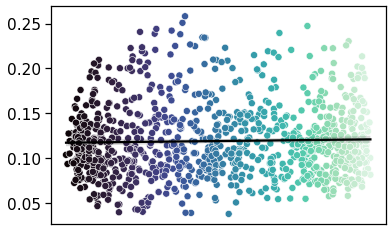

In [54]:

fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["fconn"]=f_conn_matrix_l[:,48]
data["G1"]=gradient1
sns.scatterplot(data["G1"],data["fconn"],
                     hue=data["G1"], s=50, palette="mako", legend=False)
reg_plot=sns.regplot( "G1","fconn", data=data, scatter=False, color="black")
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
#ax.set_yticks([])
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure3/scatter_fconnG1_pos.svg", transparent=True, format='svg', dpi=600)


/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


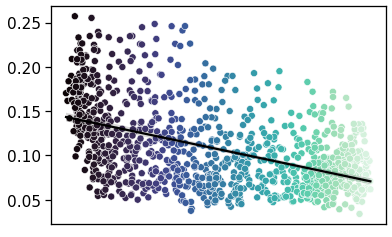

In [55]:
plt.rcParams['axes.linewidth'] = 1.3
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["fconn"]=f_conn_matrix_l[:,96]
data["G1"]=gradient1
sns.scatterplot(data["G1"],data["fconn"],
                     hue=data["G1"], s=50, palette="mako", legend=False)
reg_plot=sns.regplot( "G1","fconn", data=data, scatter=False, color="black")
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
#ax.set_yticks([])
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure3/scatter_fconnG1_neg.svg", transparent=True, format='svg', dpi=600)


## G2

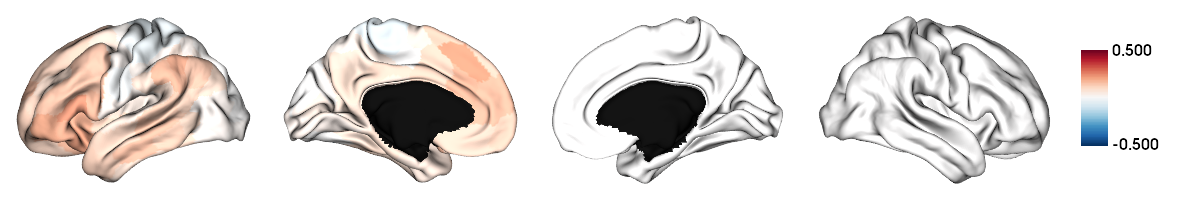

In [5]:
#iterate over columns (~parcels)
for p in range(100): #left hem
    r=np.corrcoef(f_conn_matrix_l[:,p],gradients_l[:,1])[0][1]  #change here depending on which gradient you want to plot
    schaefer_pc[0,p]=r           # fill into vector
np.save("/data/p_02666/Project1_thalamus/functional_connectivity/corr_grad2_fconn_on_cortex_lh.npy",schaefer_pc) #change name 

surf_lh, surf_rh = load_conte69()
labeling = load_parcellation('schaefer', scale=200, join=True)
mask = labeling != 0
grad = map_to_labels(schaefer_pc[0,:], labeling, mask , fill=np.nan)

plot_hemispheres(surf_lh, surf_rh, array_name=grad,
                 cmap="RdBu_r",color_bar=True,
                 background=(1,1,1),size=(1200,200), zoom=1.5,
                 color_range=(-0.5,0.5), #(-0.5,0.5),
                 embed_nb=True,
                 interactive=False,
                 screenshot=screenshot, 
                 transparent_bg=True,
                 filename = "/data/p_02666/Project1_thalamus/plots/figure3/corr_g2_func_on_cortex_lh_rdbu.png")   #change name 


In [7]:
schaefer_pc[0,:]<0


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

# structural covariance

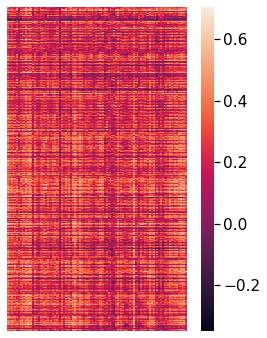

In [23]:
# plot func_conn matrix 
s_cov_matrix_l=np.load("/data/p_02666/Project1_thalamus/structural_covariance/voxelwise_struc_cov/struc_cov_meanint_lh.npy")

fig, ax = plt.subplots(1, figsize=(4,5))
fig = sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 1.5, 'font.family':'Arial'})
fig = sns.heatmap(data=s_cov_matrix_l ,ax = ax,  #vmin=0, vmax=1
                  cbar=True , cbar_kws={"orientation":"vertical","pad":0.06, "aspect":25},
                  cmap="rocket", xticklabels=False, yticklabels=False)
#ax.set_xlabel("cortex parcels", fontname="Arial", labelpad=9, fontsize=23)
#ax.set_ylabel("thalamic seed voxels", fontname="Arial", labelpad=9, fontsize=23)

plt.tight_layout()
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure3/s_cov_matrix_lh.png", transparent=True, format='png', dpi=600)




## G1

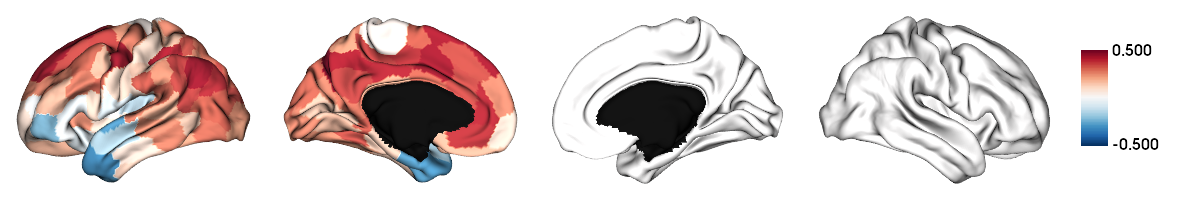

In [24]:
# correlation with Gsconn and project on surface 

gradients = np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/gradients_lh.npy")
schaefer_pc=np.zeros((1,200))

# iterate over comlumns (~parcels)
for p in range(100): #left hem
    r=np.corrcoef(s_cov_matrix_l[:,p],gradients[:,0])[0][1]  #change here depending on which gradient you want to plot
    schaefer_pc[0,p]=r           # fill into vector

np.save("/data/p_02666/Project1_thalamus/structural_covariance/voxelwise_struc_cov/meanint_corr_grad1_colums_lh.npy", schaefer_pc)
    
surf_lh, surf_rh = load_conte69()
labeling = load_parcellation('schaefer', scale=200, join=True)
mask = labeling != 0
grad = map_to_labels(schaefer_pc[0,:], labeling, mask , fill=np.nan)

plot_hemispheres(surf_lh, surf_rh, array_name=grad,
                 cmap=cmap,color_bar=True,
                 background=(1,1,1),size=(1200,200),zoom=1.5,
                 color_range= (-0.5,0.5),  #(-0.46,0.46),
                 embed_nb=True,
                 interactive=False,
                 screenshot=screenshot, 
                 transparent_bg=True,
                 filename = "/data/p_02666/Project1_thalamus/plots/figure3/corr_g1_scov_on_cortex_lh_rdbu.png")

/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


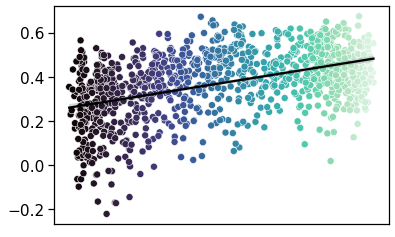

In [60]:
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["s_cov_matrix"]=s_cov_matrix_l[:,70]
data["G1"]=gradient1
sns.scatterplot(data["G1"],data["s_cov_matrix"],
                     hue=data["G1"], s=50, palette="mako", legend=False)
reg_plot=sns.regplot( "G1","s_cov_matrix", data=data, scatter=False, color="black")
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
#ax.set_yticks([])
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure3/scatter_scovG1_pos.svg", transparent=True, format='svg', dpi=600)


/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


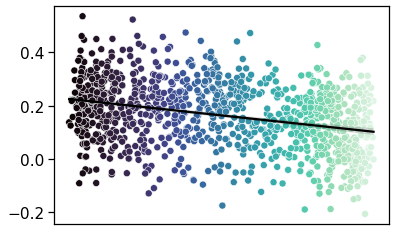

In [61]:
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["s_cov_matrix"]=s_cov_matrix_l[:,73]
data["G1"]=gradient1
sns.scatterplot(data["G1"],data["s_cov_matrix"],
                     hue=data["G1"], s=50, palette="mako", legend=False)
reg_plot=sns.regplot( "G1","s_cov_matrix", data=data, scatter=False, color="black")
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
#ax.set_yticks([])
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure3/scatter_scovG1_neg.svg", transparent=True, format='svg', dpi=600)


## G2

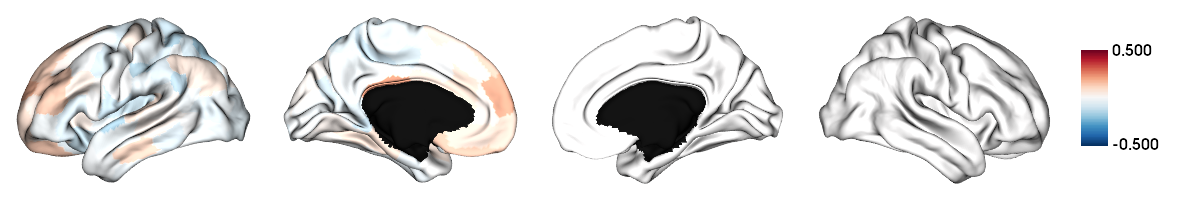

In [26]:
gradients = np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/gradients_lh.npy")
schaefer_pc=np.zeros((1,200))

# iterate over comlumns (~parcels)
for p in range(100): #left hem
    r=np.corrcoef(s_cov_matrix_l[:,p],gradients[:,1])[0][1]  #change here depending on which gradient you want to plot
    schaefer_pc[0,p]=r           # fill into vector

np.save("/data/p_02666/Project1_thalamus/structural_covariance/voxelwise_struc_cov/meanint_corr_grad2_colums_lh.npy", schaefer_pc)
    
surf_lh, surf_rh = load_conte69()
labeling = load_parcellation('schaefer', scale=200, join=True)
mask = labeling != 0
grad = map_to_labels(schaefer_pc[0,:], labeling, mask , fill=np.nan)

plot_hemispheres(surf_lh, surf_rh, array_name=grad,
                 cmap=cmap,color_bar=True,
                 background=(1,1,1),size=(1200,200),zoom=1.5,
                 color_range= (-0.5,0.5),   #(-0.27,0.27),
                 embed_nb=True,
                 interactive=False,
                 screenshot=screenshot, 
                 transparent_bg=True,
                 filename = "/data/p_02666/Project1_thalamus/plots/figure3/corr_g2_scov_on_cortex_lh_rdbu.png")

In [28]:
np.min(schaefer_pc)

-0.17595152537620287